In [1]:
import numpy as np
from scipy.linalg import eigh
from viga import Viga
import plotfrecs as pf
import pdb
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('figure', figsize=(15,10))
plt.rc('font', size=22)
modo = 'long'
modo_name = 'Longitudinal'

Iniciamos el objeto Viga.

In [2]:
V = Viga(1, 210e9, 10e-4, 7850, 10e-8)
#V.mesh(3, 'long')

In [3]:
# Estudio de convergencia, modos transversales lump vs consistentes
maxmode = 6
nmax = 15
ws, ds = V.converge_study(nmax, maxmode, modo)
# solucion de muchos modos

In [4]:
A= np.zeros([15,10])*np.nan

In [5]:
V.mesh(100, modo)
wv, dv = V.solvemods(V.K, V.M)
# dv = dv[::2, :] / dv[-2, :]
xv = np.linspace(0, 1, 101)
w_lump, d_lump = V.converge_study(nmax, maxmode,  modo+'_lump')

In [6]:
MODES = [ds, d_lump]
labels=('consistentes', 'concentradadas')

IndexError: index 2 is out of bounds for axis 1 with size 2

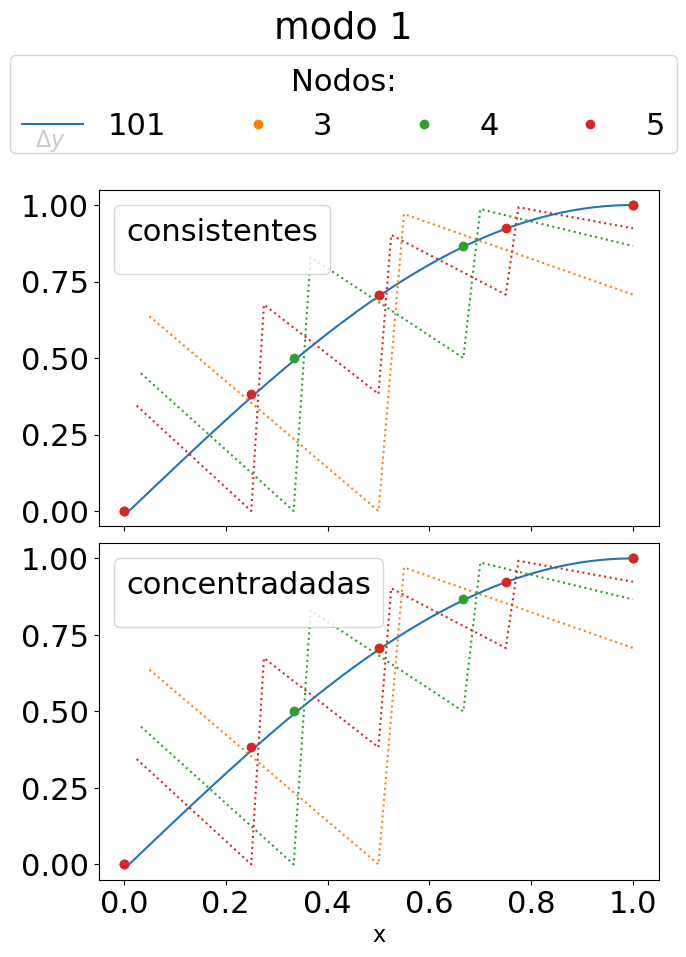

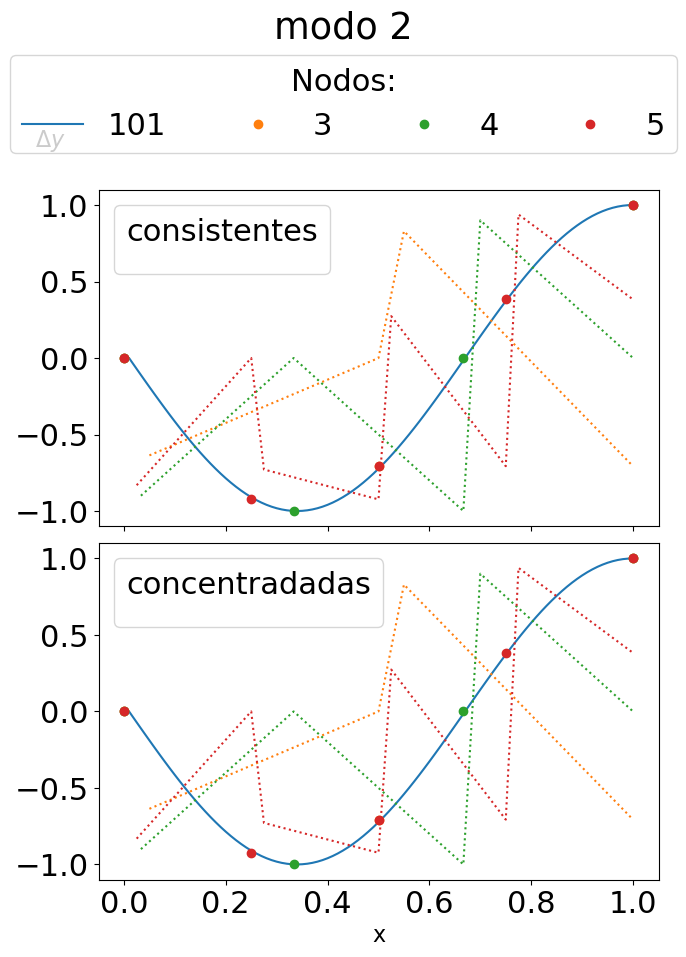

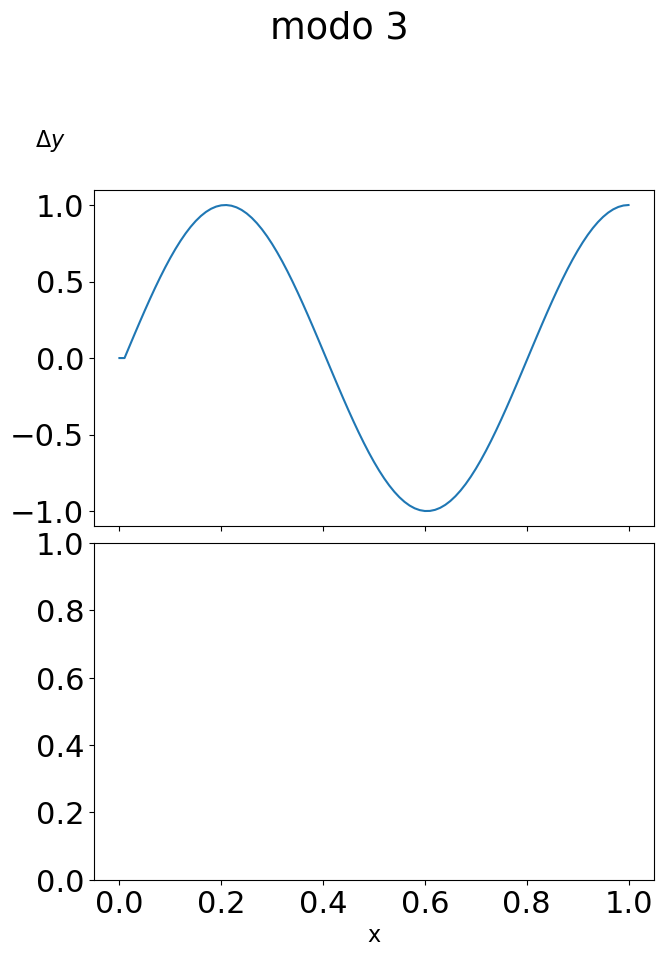

In [7]:
fig = pf.plotmodes(MODES, [2, 3, 4], dv, labels, modo_name, modo = modo , glstep=1)

In [8]:
%matplotlib inline

In [9]:
fig[0].get_axes()

[<AxesSubplot:>, <AxesSubplot:xlabel='x'>]

/home/mariano/modelizacion/SolucionesProblemas/Guia4-MEF-dt/Guia4-python/Ejercicio1/plotfrecs.py:34: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lin,
/home/mariano/modelizacion/SolucionesProblemas/Guia4-MEF-dt/Guia4-python/Ejercicio1/plotfrecs.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


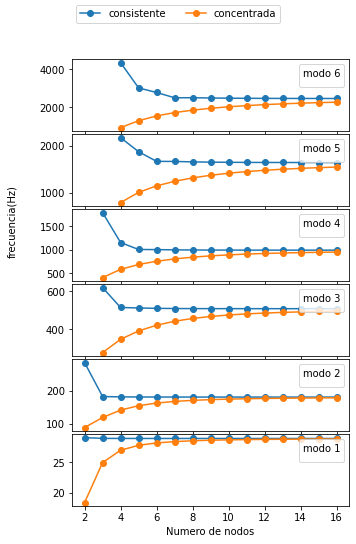

In [10]:
ws = [wtrans, wtrans_lump]
cases = ['consistente', 'concentrada']
name='transversal'
pf.plotfrecs(ws, cases, name)

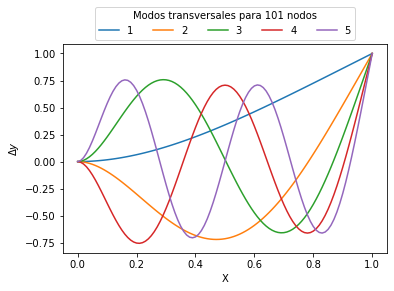

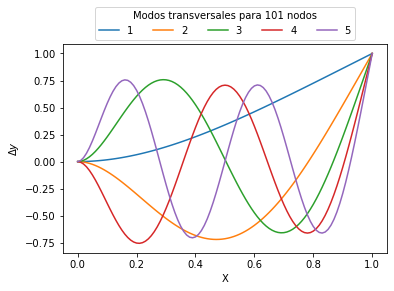

In [11]:
# los primeros 5 modos trans
pf.allmodesplot(dv[:,:5], 'transversales', fig_size=(4, 10))

In [28]:
import gmsh

In [62]:
gmsh.initialize()
modelname = 'ModosTransversales'
gmsh.model.add(modelname)
MN = np.hstack([V.MN, np.zeros([len(V.MN), 1])])
nodetags = np.linspace(1, len(V.MN), len(V.MN)).astype(int)
elementtags = np.linspace(1, len(V.MC)+1, len(V.MC)).astype(int)
Points = []
Points.append(gmsh.model.geo.addPoint(*np.append(MN[0],[1])))
Points.append(gmsh.model.geo.addPoint(*np.append(MN[-1],[1])))
L = gmsh.model.geo.addLine(*Points)
gmsh.model.geo.synchronize()
group = gmsh.model.addPhysicalGroup(1, [L])
gmsh.model.mesh.addNodes(1, L, nodetags, MN.ravel())
gmsh.model.mesh.addElements(1, L, [1], [elementtags], [V.MC.ravel()+1])
gmsh.option.setNumber("Mesh.MshFileVersion", 2.2)

imodo = 3

thisview = gmsh.view.add(f'modo{imodo}')
mode = dtrans[-1][0][::2,imodo-1].reshape(-1,1)
zeros = np.zeros((len(nodetags), 1))

omega = wtrans[-1,imodo-1]
T = 2*np.pi / (omega)
ts = np.linspace(0, T, 10)
#fig,ax = plt.subplots(1,len(ts), figsize=(15,5), sharey=True)

for i, t in enumerate(ts[:-1]):
    D = np.hstack([zeros, mode*np.sin(omega*t).reshape(-1,1),zeros])
    gmsh.view.addModelData(
        modo1, i, modelname,'NodeData', nodetags, D, t, numComponents=3 )

gmsh.option.setNumber("Mesh.MshFileVersion", 2.2)

gmsh.write(f'Modo{imodo}.msh')

gmsh.fltk.run()

gmsh.finalize()

Info    : Writing 'Modo3.msh'...
Info    : Done writing 'Modo3.msh'
-------------------------------------------------------
Version       : 4.8.4
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20210428
Build host    : gmsh.info
Build options : 64Bit ALGLIB ANN Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen Fltk Gmm Hxt Jpeg[fltk] Kbipack Lapack[petsc] LinuxJoystick MathEx Med Mesh Metis Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OptHom PETSc Parser Plugins Png[fltk] Post QuadTri Solver TetGen/BR Voro++ Zlib[fltk]
FLTK version  : 1.4.0
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.6.0
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------
